In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import scipy.stats
from scipy.stats import spearmanr
import semopy as sem

In [2]:
df = pd.read_csv(r"replace with your path")

In [ ]:
df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   new_tweet              2420 non-null   object 
 1   tokens                 2420 non-null   object 
 2   vaccinated             2420 non-null   int64  
 3   sentiment_score        2420 non-null   float64
 4   sentiment_label        2420 non-null   object 
 5   favorite_count         2420 non-null   int64  
 6   retweet_count          2420 non-null   int64  
 7   user_favourites_count  2420 non-null   int64  
 8   user_followers_count   2420 non-null   int64  
 9   user_friends_count     2420 non-null   int64  
 10  user_listed_count      2420 non-null   int64  
 11  favorite_log           2420 non-null   float64
 12  retweet_log            2420 non-null   float64
 13  user_favourites_log    2420 non-null   float64
 14  user_followers_log     2420 non-null   float64
 15  user

# EDA

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

In [ ]:
df['vaccinated'].value_counts().plot(kind='bar', xlabel='category', ylabel='Count', rot=0)

In [ ]:
df['vaccinated'].value_counts()

In [ ]:
df.sentiment_score.hist()

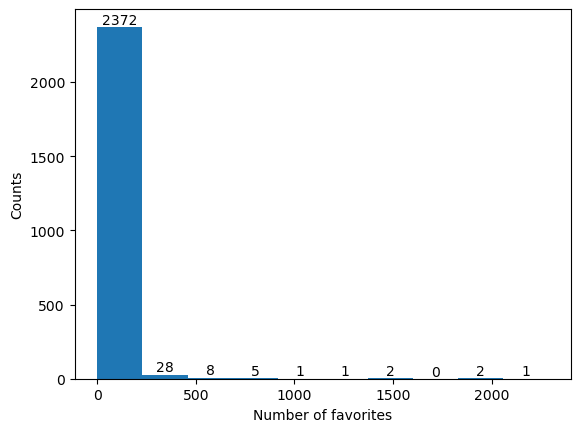

In [19]:
values, bins, bars = plt.hist(df['favorite_count'])
plt.xlabel("Number of favorites")
plt.ylabel("Counts")
plt.bar_label(bars)
plt.show()

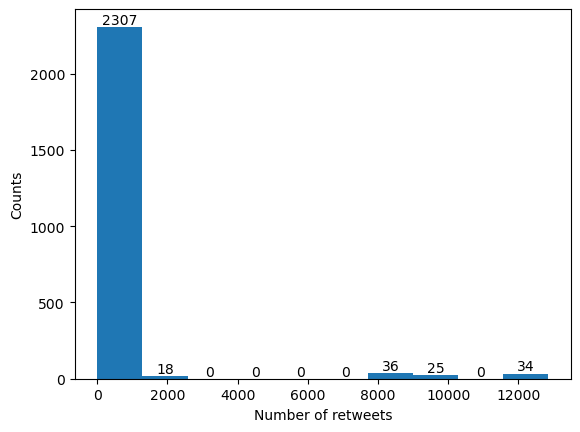

In [5]:
values, bins, bars = plt.hist(df['retweet_count'])
plt.xlabel("Number of retweets")
plt.ylabel("Counts")
plt.bar_label(bars)
plt.show()

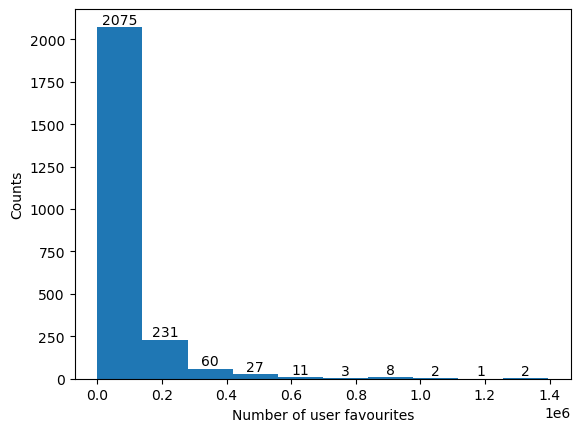

In [6]:
values, bins, bars = plt.hist(df['user_favourites_count'])
plt.xlabel("Number of user favourites")
plt.ylabel("Counts")
plt.bar_label(bars)
plt.show()

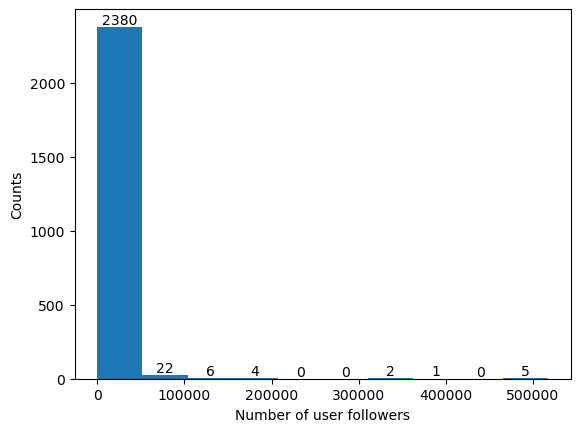

In [7]:
values, bins, bars = plt.hist(df['user_followers_count'])
plt.xlabel("Number of user followers")
plt.ylabel("Counts")
plt.bar_label(bars)
plt.show()

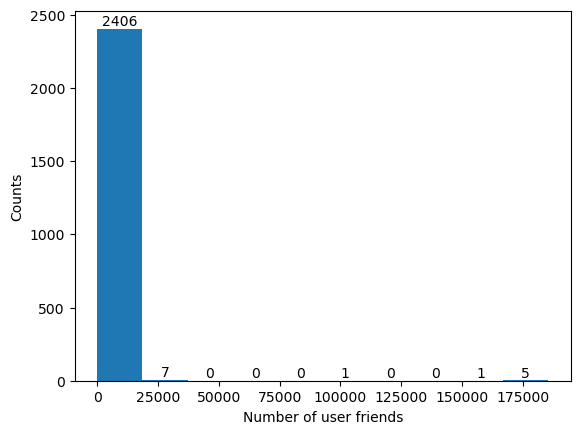

In [8]:
values, bins, bars = plt.hist(df['user_friends_count'])
plt.xlabel("Number of user friends")
plt.ylabel("Counts")
plt.bar_label(bars)
plt.show()

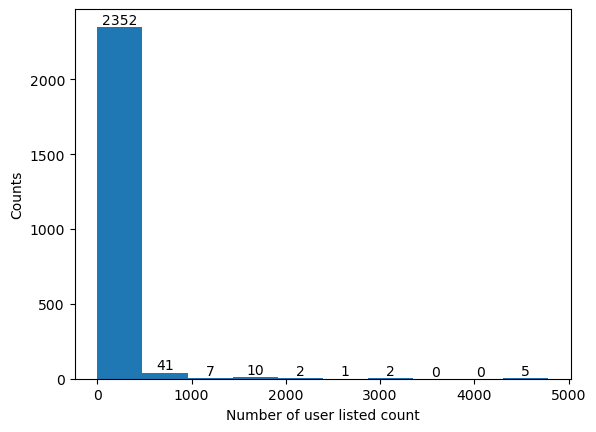

In [9]:
values, bins, bars = plt.hist(df['user_listed_count'])
plt.xlabel("Number of user listed count")
plt.ylabel("Counts")
plt.bar_label(bars)
plt.show()

## keep count data as they are

In [ ]:
count_col=['vaccinated', 'sentiment_score', 'favorite_count', 'retweet_count', 'user_favourites_count', 'user_followers_count', 'user_friends_count', 'user_listed_count']
corr_count=df[count_col].corr('spearman')
corr_count

In [ ]:
sns.heatmap(data=corr_count,cmap='Oranges',annot=True)

In [ ]:
df_count=df[count_col]

In [ ]:
df_count.describe()

## natural log transformation

In [ ]:
numeric_cols = ['favorite_count', 'retweet_count', 'user_favourites_count', 'user_followers_count', 'user_friends_count', 'user_listed_count']

In [ ]:
df[numeric_cols] += 1

In [10]:
df['favorite_log'] = np.log(df['favorite_count'])
df['retweet_log'] = np.log(df['retweet_count'])
df['user_favourites_log'] = np.log(df['user_favourites_count'])
df['user_followers_log'] = np.log(df['user_followers_count'])
df['user_friends_log'] = np.log(df['user_friends_count'])
df['user_listed_log'] = np.log(df['user_listed_count'])

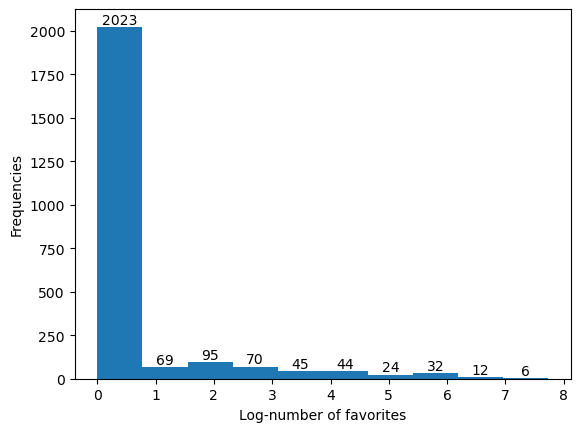

In [11]:
values, bins, bars = plt.hist(df['favorite_log'])
plt.xlabel("Log-number of favorites")
plt.ylabel("Frequencies")
plt.bar_label(bars)
plt.show()

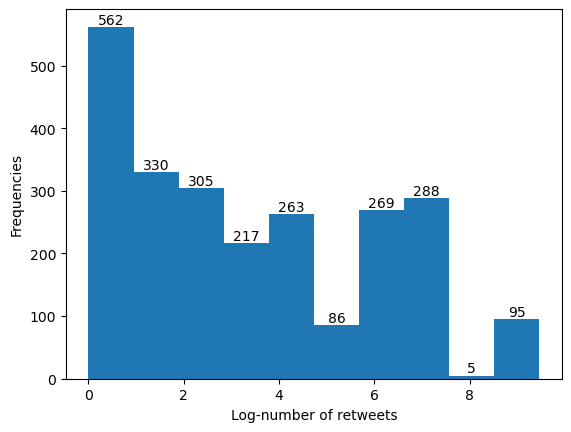

In [12]:
values, bins, bars = plt.hist(df['retweet_log'])
plt.xlabel("Log-number of retweets")
plt.ylabel("Frequencies")
plt.bar_label(bars)
plt.show()

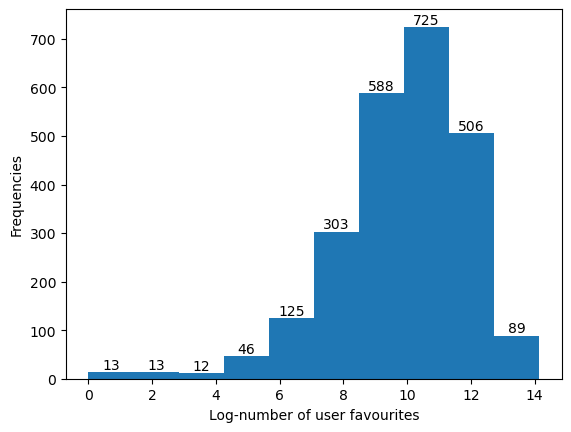

In [13]:
values, bins, bars = plt.hist(df['user_favourites_log'])
plt.xlabel("Log-number of user favourites")
plt.ylabel("Frequencies")
plt.bar_label(bars)
plt.show()

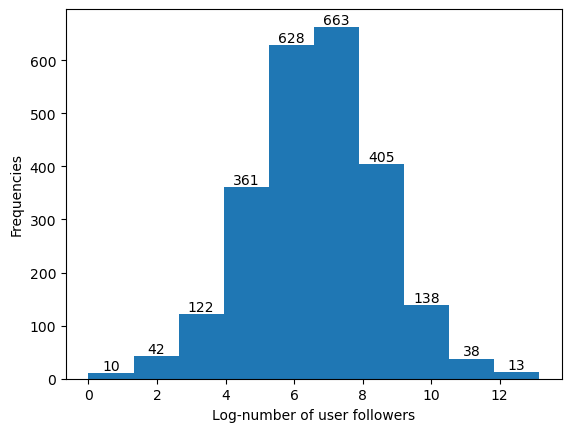

In [14]:
values, bins, bars = plt.hist(df['user_followers_log'])
plt.xlabel("Log-number of user followers")
plt.ylabel("Frequencies")
plt.bar_label(bars)
plt.show()

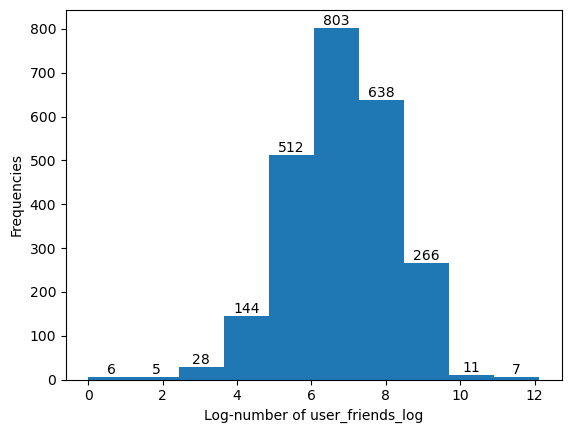

In [15]:
values, bins, bars = plt.hist(df['user_friends_log'])
plt.xlabel("Log-number of user_friends_log")
plt.ylabel("Frequencies")
plt.bar_label(bars)
plt.show()

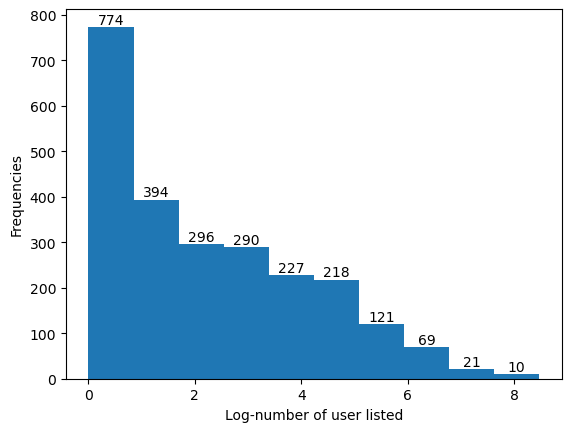

In [16]:
values, bins, bars = plt.hist(df['user_listed_log'])
plt.xlabel("Log-number of user listed")
plt.ylabel("Frequencies")
plt.bar_label(bars)
plt.show()

<Axes: >

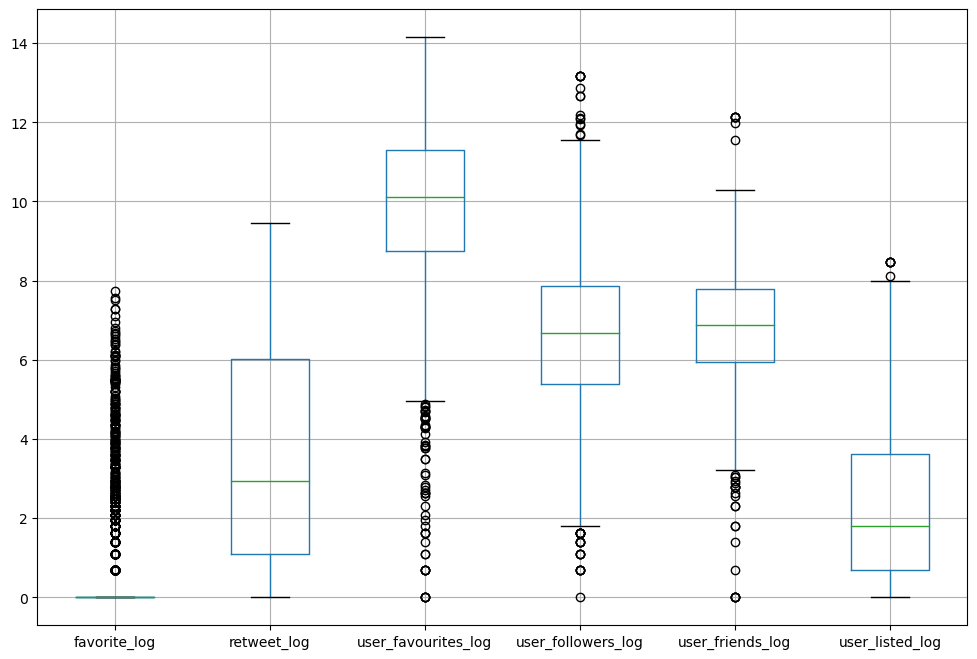

In [10]:
df.boxplot(column=['favorite_log', 'retweet_log', 'user_favourites_log', 'user_followers_log', 'user_friends_log', 'user_listed_log'], figsize=(12,8))

In [4]:
cols_to_plot = ['vaccinated', 'sentiment_score', 'retweet_log', 'user_favourites_log', 'user_followers_log', 'user_friends_log', 'user_listed_log']

In [ ]:
df.describe()

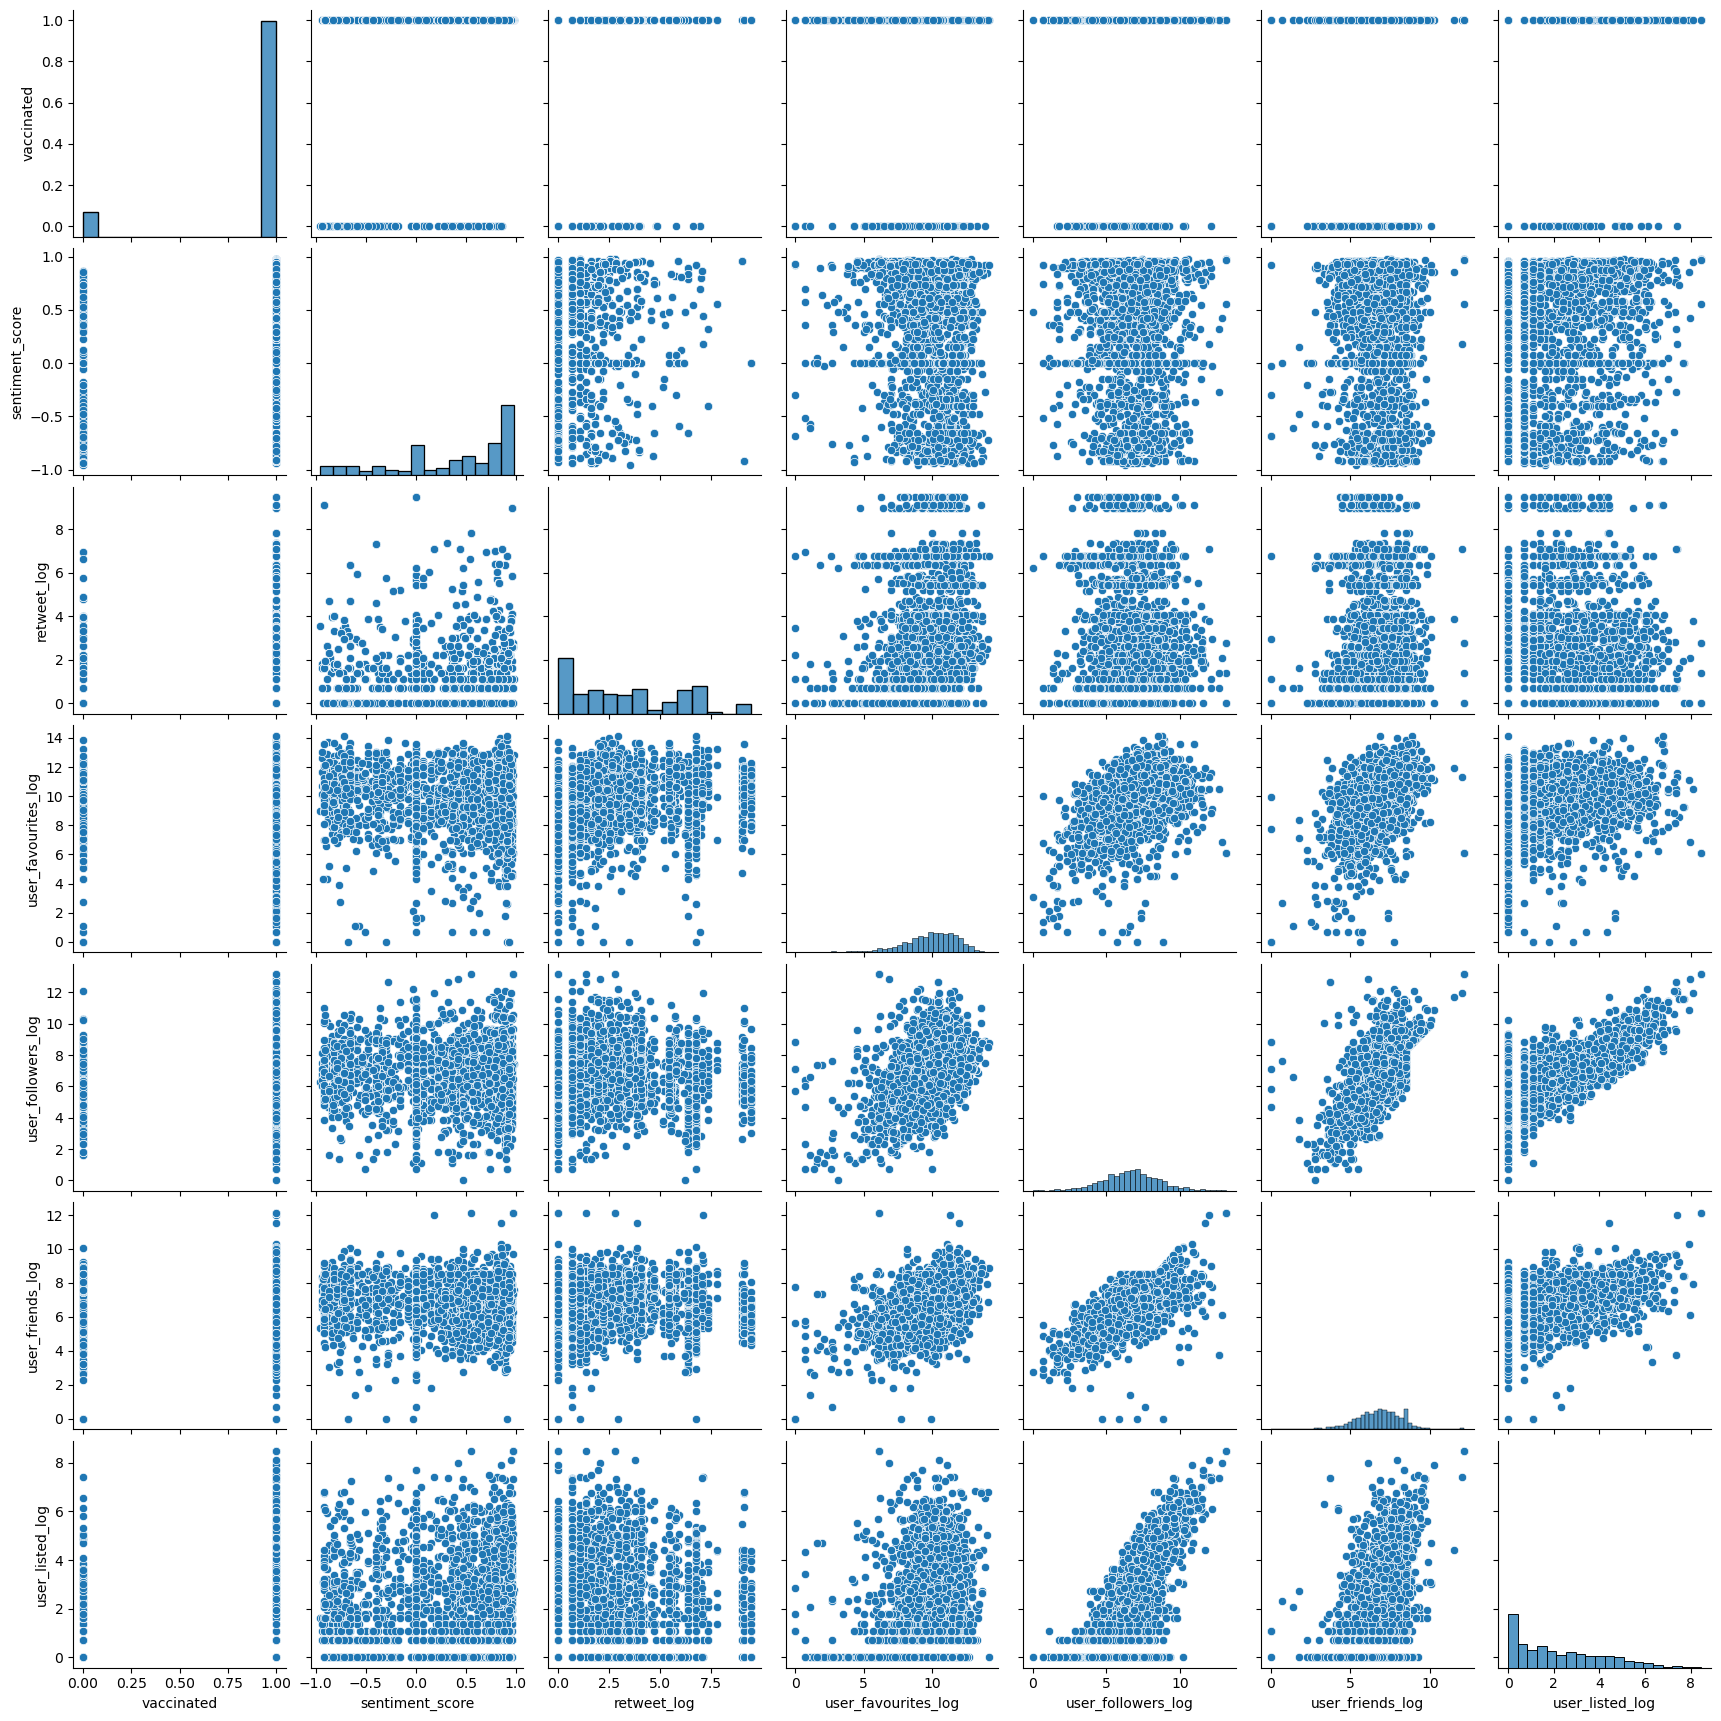

In [5]:
sns.pairplot(df[cols_to_plot])

In [6]:
log_col=['vaccinated', 'sentiment_score', 'favorite_log', 'retweet_log', 'user_favourites_log', 'user_followers_log', 'user_friends_log', 'user_listed_log']
corr=df[log_col].corr(method="spearman")
corr

,vaccinated,sentiment_score,favorite_log,retweet_log,user_favourites_log,user_followers_log,user_friends_log,user_listed_log
vaccinated,1.000000,0.297946,0.022659,0.179467,0.014294,0.048718,0.014540,0.171578
sentiment_score,0.297946,1.000000,-0.105650,0.398969,-0.061285,-0.108986,-0.050410,-0.047067
favorite_log,0.022659,-0.105650,1.000000,-0.486241,-0.145745,0.181654,0.033447,0.182208
retweet_log,0.179467,0.398969,-0.486241,1.000000,0.198846,-0.090038,0.002722,-0.095588
user_favourites_log,0.014294,-0.061285,-0.145745,0.198846,1.000000,0.389289,0.440457,0.151347
user_followers_log,0.048718,-0.108986,0.181654,-0.090038,0.389289,1.000000,0.726337,0.726912
user_friends_log,0.014540,-0.050410,0.033447,0.002722,0.440457,0.726337,1.000000,0.494660
user_listed_log,0.171578,-0.047067,0.182208,-0.095588,0.151347,0.726912,0.494660,1.000000


<Axes: >

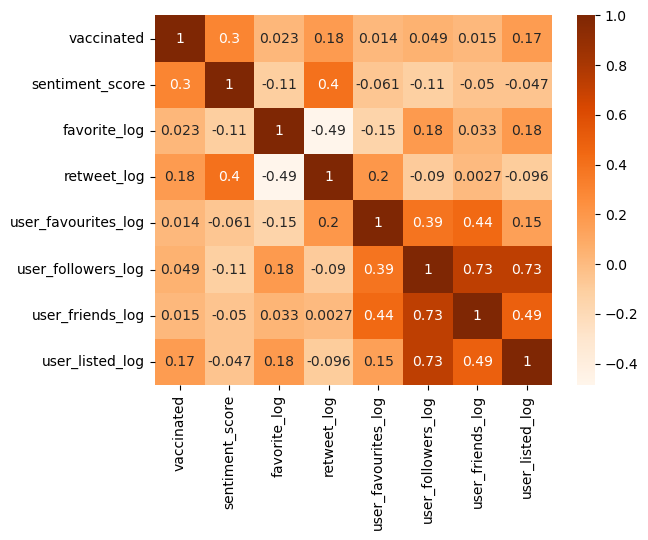

In [7]:
sns.heatmap(data=corr,cmap='Oranges',annot=True)

In [8]:
df_log=df[log_col]

In [9]:
rho = df_log.corr(method="spearman")
pval = df_log.corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(4).astype(str) + p

,vaccinated,sentiment_score,favorite_log,retweet_log,user_favourites_log,user_followers_log,user_friends_log,user_listed_log
vaccinated,1.0***,0.2979***,0.0227,0.1795***,0.0143,0.0487*,0.0145,0.1716***
sentiment_score,0.2979***,1.0***,-0.1057***,0.399***,-0.0613**,-0.109***,-0.0504*,-0.0471*
favorite_log,0.0227,-0.1057***,1.0***,-0.4862***,-0.1457***,0.1817***,0.0334,0.1822***
retweet_log,0.1795***,0.399***,-0.4862***,1.0***,0.1988***,-0.09***,0.0027,-0.0956***
user_favourites_log,0.0143,-0.0613**,-0.1457***,0.1988***,1.0***,0.3893***,0.4405***,0.1513***
user_followers_log,0.0487*,-0.109***,0.1817***,-0.09***,0.3893***,1.0***,0.7263***,0.7269***
user_friends_log,0.0145,-0.0504*,0.0334,0.0027,0.4405***,0.7263***,1.0***,0.4947***
user_listed_log,0.1716***,-0.0471*,0.1822***,-0.0956***,0.1513***,0.7269***,0.4947***,1.0***


In [ ]:
df_log.describe()

## confirmatory factor analysis 

In [ ]:
#for log data
model_spec0 = """
  # measurement model
    tweet_engagement =~ favorite_log + retweet_log + sentiment_score
    user_engagement =~ user_followers_log + user_listed_log + user_friends_log + user_favourites_log
"""

In [ ]:
model0 = sem.Model(model_spec0)

In [ ]:
model0.fit(data=df_log, obj='DWLS')
#model0.fit(data=df_count, obj='DWLS')

In [ ]:
model0.inspect()

In [ ]:
sem.calc_stats(model0)

In [ ]:
sem.semplot(model0, 'vaccianted_VaxIntent_CFA0.png')

In [ ]:
sem.efa.explore_cfa_model(df_log, min_loadings=2, pval=0.05)
#sem.efa.explore_cfa_model(df_count, min_loadings=2, pval=0.05)

In [ ]:
#for log data
model_spec1 = """
  # measurement model
    tweet_engagement =~ favorite_log + retweet_log + sentiment_score
"""

In [ ]:
model1 = sem.Model(model_spec1)

In [ ]:
model1.fit(data=df_log, obj='DWLS')

In [ ]:
model1.inspect()

In [ ]:
sem.calc_stats(model1)

In [ ]:
sem.semplot(model1, 'vaccianted_VaxIntent_CFA1.png')

In [ ]:
#for log data
model_spec2 = """
  # measurement model
    user_engagement =~ user_followers_log + user_listed_log + user_friends_log + user_favourites_log
"""

In [ ]:
model2 = sem.Model(model_spec2)

In [ ]:
model2.fit(data=df_log, obj='DWLS')

In [ ]:
sem.calc_stats(model2)

In [ ]:
sem.semplot(model2, 'vaccianted_VaxIntent_CFA2.png')

In [ ]:
#for log data
model_spec3 = """
  # measurement model
    tweet_engagement =~ favorite_log + retweet_log + sentiment_score
    user_engagement =~ user_followers_log + user_listed_log + user_friends_log + user_favourites_log
"""

In [ ]:
model3 = sem.Model(model_spec3)

In [ ]:
model3.fit(data=df_log, obj='DWLS')

In [ ]:
sem.calc_stats(model3)

In [ ]:
sem.semplot(model3, 'vaccianted_VaxIntent_CFA3.png')

In [ ]:
#for log data
model_spec4 = """
  # measurement model
    tweet_engagement =~ vaccinated + favorite_log + retweet_log + sentiment_score
    user_engagement =~ vaccinated + user_favourites_log + user_followers_log + user_friends_log + user_listed_log
"""

In [ ]:
model4 = sem.Model(model_spec4)

In [ ]:
model4.fit(data=df_log, obj='DWLS')

In [ ]:
sem.calc_stats(model4)

In [ ]:
sem.semplot(model4, 'vaccianted_VaxIntent_CFA3.png')

In [ ]:
#for count data
model_spec0 = """
  # measurement model
    VaxIntent =~ vaccinated
    tweet_engagement =~ favorite_count + retweet_count + sentiment_score
    user_engagement =~ user_followers_count + user_listed_count + user_friends_count + user_favourites_count
"""

# SEM without further feature engineering (i.e., keeping outliers)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df_log['vaccinated'] = encoder.fit_transform(df_log['vaccinated'])
#df_count['vaccinated'] = encoder.fit_transform(df_count['vaccinated'])

In [ ]:
df_log.vaccinated.hist()
#df_count.vaccinated.hist()

In [ ]:
#for log data
model_spec1 = """
  # measurement model
    tweet_engagement =~ favorite_log + retweet_log + sentiment_score
    user_engagement =~ user_followers_log + user_listed_log + user_friends_log + user_favourites_log
  # regressions
    vaccinated ~ tweet_engagement + user_engagement
"""

In [ ]:
#for count data
model_spec1 = """
  # measurement model
    VaxIntent =~ vaccinated
    tweet_engagement =~ favorite_count + retweet_count + sentiment_score
    user_engagement =~ user_followers_count + user_listed_count + user_friends_count + user_favourites_count
  # regressions
    VaxIntent ~ tweet_engagement + user_engagement
"""

In [ ]:
model1 = sem.Model(model_spec1)

In [ ]:
model1.fit(data=df_log, obj='DWLS')
#model1.fit(data=df_count, obj='DWLS')

In [ ]:
model1.inspect()

In [ ]:
sem.calc_stats(model1)

In [ ]:
sem.semplot(model1, 'vaccianted_VaxIntent_model1_base.png')

In [ ]:
#for log data
model_spec2 = """
  # measurement model
    VaxIntent =~ vaccinated
    tweet_engagement =~ favorite_log + retweet_log + sentiment_score
    user_engagement =~ user_followers_log + user_listed_log + user_friends_log + user_favourites_log
  # regressions
    VaxIntent ~ tweet_engagement + user_engagement
"""

In [ ]:
#for count data
model_spec2 = """
  # measurement model
    VaxIntent =~ vaccinated
  # regressions
    VaxIntent ~ favorite_count + retweet_count + sentiment_score + user_followers_count + user_listed_count + user_friends_count + user_favourites_count
"""

In [ ]:
model2 = sem.Model(model_spec2)

In [ ]:
model2.fit(data=df_log, obj='DWLS')
#model2.fit(data=df_count, obj='DWLS')

In [ ]:
model2.inspect()

In [ ]:
sem.calc_stats(model2)

In [ ]:
sem.semplot(model2, 'vaccianted_VaxIntent_model2_base.png')

In [ ]:
#for log data
model_spec3 = """
  # measurement model
    VaxIntent =~ vaccinated
  # regressions
    VaxIntent ~ favorite_log + retweet_log + sentiment_score + user_favourites_log + user_followers_log +user_friends_log + user_listed_log
"""

In [ ]:
#for count data
model_spec3 = """
  # measurement model
    VaxIntent =~ vaccinated
  # regressions
    VaxIntent ~ favorite_count + retweet_count + sentiment_score + user_favourites_count + user_followers_count + user_listed_count
"""

In [ ]:
model3 = sem.Model(model_spec3)

In [ ]:
model3.fit(data=df_log, obj='DWLS')
#model3.fit(data=df_count, obj='DWLS')

In [ ]:
model3.inspect()

In [ ]:
sem.calc_stats(model3)

In [ ]:
sem.semplot(model3, 'vaccianted_VaxIntent_model3_base.png')

In [ ]:
#for log data
model_spec4 = """
  # measurement model
    VaxIntent =~ vaccinated
  # regressions
    VaxIntent ~ favorite_log + retweet_log + sentiment_score + user_favourites_log + user_followers_log + user_listed_log
"""

In [ ]:
#for count data
model_spec4 = """
  # measurement model
    VaxIntent =~ vaccinated
  # regressions
    VaxIntent ~ favorite_count + retweet_count + sentiment_score + user_favourites_count + user_listed_count
"""

In [ ]:
model4 = sem.Model(model_spec4)

In [ ]:
model4.fit(data=df_log, obj='DWLS')
#model4.fit(data=df_count, obj='DWLS')

In [ ]:
model4.inspect()

In [ ]:
sem.calc_stats(model4)

In [ ]:
sem.semplot(model4, 'vaccianted_VaxIntent_model4_base.png')

In [ ]:
model_spec5 = """
  # regressions
    vaccinated ~ favorite_log + retweet_log +sentiment_score + user_favourites_log + user_followers_log + user_listed_log
"""

In [ ]:
model_spec5 = """
  # regressions
    vaccinated ~ favorite_count + retweet_count + user_favourites_count + user_listed_count
"""

In [ ]:
model5 = sem.Model(model_spec5)

In [ ]:
model5.fit(data=df_log, obj='DWLS')
#model5.fit(data=df_count, obj='DWLS')

In [ ]:
model5.inspect()

In [ ]:
sem.calc_stats(model5)

In [ ]:
sem.semplot(model5, 'vaccianted_VaxIntent_model5_base.png')

# SEM with outliers dropped

In [ ]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [ ]:
outliers = find_outliers_IQR(df_log[['favorite_log', 'retweet_log', 'user_favourites_log', 'user_followers_log', 'user_friends_log', 'user_listed_log']])
#outliers = find_outliers_IQR(df_count[['favorite_count', 'retweet_count', 'user_favourites_count', 'user_followers_count', 'user_friends_count', 'user_listed_count']])

In [ ]:
outliers.isna().sum()

In [ ]:
def drop_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))].dropna()
    return not_outliers

In [ ]:
df3=drop_outliers_IQR(df_log)
#df3=drop_outliers_IQR(df_count)

In [ ]:
df3.boxplot(column=['favorite_log', 'retweet_log', 'user_favourites_log', 'user_followers_log', 'user_friends_log', 'user_listed_log'], figsize=(12,8))
#df3.boxplot(column=['favorite_count', 'retweet_count', 'user_favourites_count', 'user_followers_count', 'user_friends_count', 'user_listed_count'], figsize=(12,8))

In [ ]:
#for log data
model_spec1 = """
  # measurement model
    VaxIntent =~ vaccinated
    tweet_engagement =~ retweet_log + sentiment_score
    user_engagement =~ user_followers_log + user_listed_log + user_friends_log + user_favourites_log
  # regressions
    VaxIntent ~ tweet_engagement + user_engagement
"""

In [ ]:
#for count data
model_spec1 = """
  # measurement model
    VaxIntent =~ vaccinated
    tweet_engagement =~ favorite_count + retweet_count + sentiment_score
    user_engagement =~ user_followers_count + user_listed_count + user_friends_count + user_favourites_count
  # regressions
    VaxIntent ~ tweet_engagement + user_engagement
"""

In [ ]:
model1 = sem.Model(model_spec1)

In [ ]:
model1.fit(df3, obj='DWLS')

In [ ]:
model1.inspect()

In [ ]:
sem.calc_stats(model1)

In [ ]:
sem.semplot(model1, 'vaccianted_VaxIntent_model1_outdrop.png')

In [ ]:
#for log data
model_spec2 = """
  # measurement model
    VaxIntent =~ vaccinated
  # regressions
    VaxIntent ~ retweet_log + sentiment_score + user_favourites_log + user_followers_log + user_friends_log + user_listed_log
"""

In [ ]:
# for count data
model_spec2 = """
  # measurement model
    VaxIntent =~ vaccinated
  # regressions
    VaxIntent ~ favorite_count + retweet_count + sentiment_score + user_followers_count + user_listed_count + user_friends_count + user_favourites_count
"""

In [ ]:
model2 = sem.Model(model_spec2)

In [ ]:
model2.fit(df3, obj='DWLS')

In [ ]:
model2.inspect()

In [ ]:
sem.calc_stats(model2)

In [ ]:
sem.semplot(model2, 'vaccianted_VaxIntent_model2_outdrop.png')

In [ ]:
#for log data
model_spec3 = """
  # measurement model
    VaxIntent =~ vaccinated
  # regressions
    VaxIntent ~ retweet_log + sentiment_score + user_favourites_log + user_followers_log + user_listed_log
"""

In [ ]:
#for count data
model_spec3 = """
  # measurement model
    VaxIntent =~ vaccinated
  # regressions
    VaxIntent ~ favorite_count + retweet_count + sentiment_score + user_favourites_count + user_followers_count + user_listed_count
"""

In [ ]:
model3 = sem.Model(model_spec3)

In [ ]:
model3.fit(df3, obj='DWLS')

In [ ]:
model3.inspect()

In [ ]:
sem.calc_stats(model3)

In [ ]:
sem.semplot(model3, 'vaccianted_VaxIntent_model3_outdrop.png')

In [ ]:
#for log data
model_spec4 = """
  # measurement model
    VaxIntent =~ user_listed_log + user_followers_log
  # regressions
    vaccinated ~ sentiment_score + retweet_log + VaxIntent
"""

In [ ]:
#for count data
model_spec4 = """
  # measurement model
    VaxIntent =~ vaccinated
  # regressions
    VaxIntent ~ favorite_count + retweet_count + sentiment_score + user_favourites_count + user_listed_count
"""

In [ ]:
model4 = sem.Model(model_spec4)

In [ ]:
model4.fit(df3, obj='DWLS')

In [ ]:
model4.inspect()

In [ ]:
sem.calc_stats(model4)

In [ ]:
sem.semplot(model4, 'vaccianted_VaxIntent_model4_outdrop.png')

# SEM - replace outliers with median

In [ ]:
def impute_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    df = np.where(df > upper, df.median(), np.where(df < lower, df.median(), df))
    return df

In [ ]:
#for log data
df3['favorite_log'] = impute_outliers_IQR(df3['favorite_log'])
df3['user_favourites_log'] = impute_outliers_IQR(df3['user_favourites_log'])
df3['user_followers_log'] = impute_outliers_IQR(df3['user_followers_log'])
df3['user_friends_log'] = impute_outliers_IQR(df3['user_friends_log'])
df3['user_listed_log'] = impute_outliers_IQR(df3['user_listed_log'])

In [ ]:
#for count data
df3['favorite_count'] = impute_outliers_IQR(df3['favorite_count'])
df3['user_favourites_count'] = impute_outliers_IQR(df3['user_favourites_count'])
df3['user_followers_count'] = impute_outliers_IQR(df3['user_followers_count'])
df3['user_friends_count'] = impute_outliers_IQR(df3['user_friends_count'])
df3['user_listed_count'] = impute_outliers_IQR(df3['user_listed_count'])

In [ ]:
df3.boxplot(column=['favorite_log', 'retweet_log', 'user_favourites_log', 'user_followers_log', 'user_friends_log', 'user_listed_log'], figsize=(12,8))
#df3.boxplot(column=['favorite_count', 'retweet_count', 'user_favourites_count', 'user_followers_count', 'user_friends_count', 'user_listed_count'], figsize=(12,8))

In [ ]:
#for log data
model_spec1 = """
  # measurement model
    VaxIntent =~ vaccinated
    tweet_engagement =~ retweet_log + sentiment_score
    user_engagement =~ user_followers_log + user_listed_log + user_friends_log + user_favourites_log
  # regressions
    VaxIntent ~ tweet_engagement + user_engagement
"""

In [ ]:
#for count data
model_spec1 = """
  # measurement model
    VaxIntent =~ vaccinated
    tweet_engagement =~ favorite_count + retweet_count + sentiment_score
    user_engagement =~ user_followers_count + user_listed_count + user_friends_count + user_favourites_count
  # regressions
    VaxIntent ~ tweet_engagement + user_engagement
"""

In [ ]:
model1 = sem.Model(model_spec1)

In [ ]:
model1.fit(df3, obj="DWLS")

In [ ]:
model1.inspect()

In [ ]:
sem.calc_stats(model1)

In [ ]:
sem.semplot(model1, 'vaccianted_VaxIntent_model1_median.png')

In [ ]:
#for log data
model_spec2 = """
  # measurement model
    VaxIntent =~ vaccinated
  # regressions
    VaxIntent ~ retweet_log + sentiment_score + user_favourites_log + user_followers_log + user_friends_log + user_listed_log
"""

In [ ]:
#for count data
model_spec2 = """
  # measurement model
    VaxIntent =~ vaccinated
  # regressions
    VaxIntent ~ favorite_count + retweet_count + sentiment_score + user_followers_count + user_listed_count + user_friends_count + user_favourites_count
"""

In [ ]:
model2 = sem.Model(model_spec2)

In [ ]:
model2.fit(df3, obj="DWLS")

In [ ]:
model2.inspect()

In [ ]:
sem.calc_stats(model2)

In [ ]:
sem.semplot(model2, 'vaccianted_VaxIntent_model2_median.png')

In [ ]:
#for log data
model_spec3 = """
  # measurement model
    VaxIntent =~ vaccinated
  # regressions
    VaxIntent ~ retweet_log + sentiment_score + user_favourites_log + user_followers_log + user_listed_log
"""

In [ ]:
model3 = sem.Model(model_spec3)

In [ ]:
model3.fit(df3, obj="DWLS")

In [ ]:
model3.inspect()

In [ ]:
sem.calc_stats(model3)

In [ ]:
sem.semplot(model3, 'vaccianted_VaxIntent_model3_median.png')

In [ ]:
#for count data
model_spec4 = """
  # measurement model
    VaxIntent =~ vaccinated
  # regressions
    VaxIntent ~ favorite_count + retweet_count + sentiment_score + user_favourites_count + user_listed_count
"""

In [ ]:
model4 = sem.Model(model_spec4)

In [ ]:
model4.fit(df3, obj="DWLS")

In [ ]:
model4.inspect()

In [ ]:
sem.calc_stats(model4)

In [ ]:
sem.semplot(model4, 'vaccianted_VaxIntent_model4_median.png')

## if sentiment score is transformed into ordinal variable 

x <= -0.05 -> negative -> 0 | 
-0.05 < x < 0.05 -> neutral -> 1 | 
x >= 0.05 -> positive -> 2

In [ ]:
def sentimentPredict(x):
    if x>= 0.05:
        return "2"
    elif x<= -0.05: 
        return "0"
    else:
        return "1"

df['sentiment_label']=df['semtiment_score'].apply(lambda x: sentimentPredict(x))

In [ ]:
df.info()

In [ ]:
model_spec1 = """
  # measurement model
    VaxIntent =~ vaccinated
    tweet_engagement =~ favorite_log + retweet_log + sentiment_label
    user_engagement =~ user_followers_log + user_listed_log + user_friends_log + user_favourites_log
  # regressions
    VaxIntent ~ tweet_engagement + user_engagement
    DEFINE(ordinal) sentiment_label
"""

In [ ]:
model1 = sem.Model(model_spec1)

In [ ]:
model1.fit(data=df, obj="DWLS")

In [ ]:
model1.inspect()

In [ ]:
sem.calc_stats(model1)

In [ ]:
sem.semplot(model1, 'vaccianted_VaxIntent_model1_ordsen.png')